In [1]:
#hw2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
#(a)1: Build a N = 400 neuron network. 
#2: Construct enough stored states ξk to satisfy P/N = 0.2, i.e., well above the expected capacity limit P/N = 0.14. 
#3:Choose each element ξk of the P = 0.2 ∗ 400 = 80 patterns at random(randomly chosen 1 or −1 as a binomial variable).

In [4]:
# set parameter
N = 400 # Number of neurons
P = int (0.2*N) # Number of stored patterns
patterns = np.random.choice([-1, 1], size=(P, N))  # Generate random stored patterns

In [9]:
#define function Wij = 1/N sum(patterns[i] * patterns[j])
def compute_weights(patterns, N):
    W = np.zeros((N, N)) #initialize a NxN matrix with zeros
    for xi in patterns:
        W += np.outer(xi,xi) #compute the sum of (patterns[i] * patterns[j]) with the given patterns
    W /= N # normalized by N
    np.fill_diagonal(W,0) #set diagonal to zero
    return W

In [10]:
# Function to update the state
def update_random(S, W):
    i = np.random.randint(0, len(S))  # Pick a random neuron
    h_i = np.dot(W[i], S)  # Compute local field (weighted sum of inputs)
    S[i] = 1 if h_i >= 0 else -1  # Update state based on sign function
    return S

In [11]:
# Test if a pattern is stable
def test_pattern(W, pattern, steps=100):
    S = pattern.copy()
    for _ in range(steps):
        S = update_random(S, W)
    return np.all(S == pattern)  # Check if pattern remains unchanged

In [12]:
# Test with one stored pattern
W1 = compute_weights(patterns[:1], N)
pattern1_stabletest = test_pattern(W1, patterns[0])
print("Pattern 1 stability:", pattern1_stabletest)

Pattern 1 stability: True


In [16]:
# Test with two stored patterns
W2 = compute_weights(patterns[:2], N)
pattern1_stabletest2 = test_pattern(W2, patterns[0])
pattern2_stabletest = test_pattern(W2, patterns[1])
print("Pattern 1 stability with 2 patterns:", pattern1_stabletest2)
print("Pattern 2 stability with 2 patterns:", pattern2_stabletest)

Pattern 1 stability with 2 patterns: True
Pattern 2 stability with 2 patterns: True


In [17]:
# Function to calculate energy
def energy(W, S):
    return -0.5 * np.dot(S.T, np.dot(W, S))

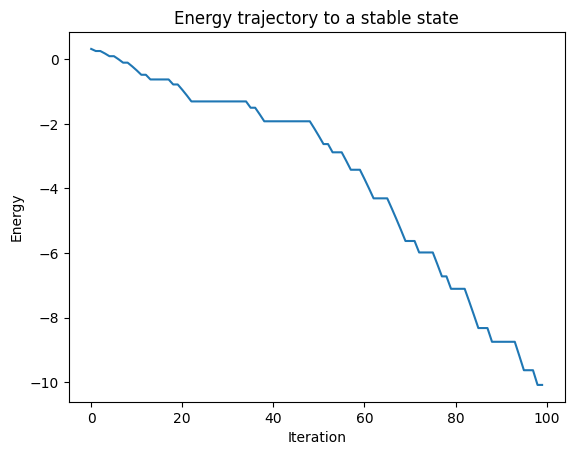

In [18]:
# Plot energy trajectory from a random state
S_random = np.random.choice([-1, 1], size=N)
energies = []
for _ in range(100):
    S_random = update_random(S_random, W1)
    energies.append(energy(W1, S_random))

plt.plot(energies)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("Energy trajectory to a stable state")
plt.show()

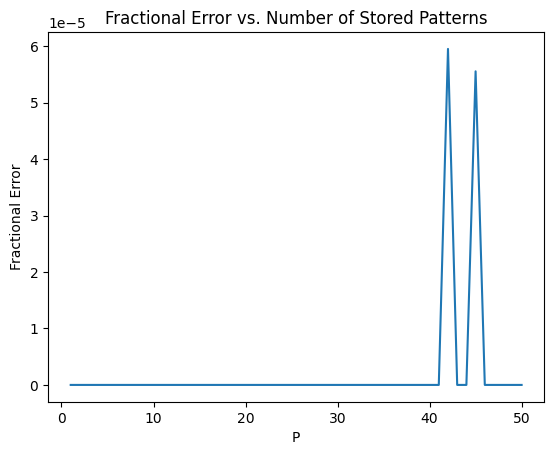

In [19]:
# Compute fractional error in recall as a function of P/N
errors = []
for p in range(1, 51):
    Wp = compute_weights(patterns[:p], N)
    error = np.mean([np.sum(update_random(pattern.copy(), Wp) != pattern) / N for pattern in patterns[:p]])
    errors.append(error)

plt.plot(range(1, 51), errors)
plt.xlabel("P")
plt.ylabel("Fractional Error")
plt.title("Fractional Error vs. Number of Stored Patterns")
plt.show()